In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx


In [2]:
#helpers

def checkData(df):
    print("Shape:", df.shape)
    print("Has Null:", df.isnull().values.any())
    return df.head()

def dropPlayers(df):
    df = df[(df['MIN'] >= 12) & (df['GP'] >= 9)]
    return df

def corrHeatMap(df):
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(),
                vmin = -1, vmax = 1, center = 0,
                cmap = sns.diverging_palette(20, 220, n = 500),
                square = True)

def highCorrGraph(df):
    # Create matrix of corrleations and select values only in the upper trinagle (excluding main diagnol)
    corrMatrix = df.corr().abs()
    upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

    upper = corrMatrix

    # Find features with correlation greater than 0.8 both negative and positives are included
    highCorrCols = []

    for col in upper.columns:
        for i in range(0, len(upper[col])):
            if upper[col][i] > 0.8 and col != upper.index.values[i]:
                highCorrCols.append((col, upper.index.values[i]))
    
    # create and draw graph
    G = nx.Graph()
    G.add_edges_from(highCorrCols)

    plt.figure(figsize = (20,20))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 1000)
    nx.draw_networkx_edges(G, pos, width = 0.5, arrowsize=100)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()  


**General**
- advanced
- basic
- defense
- scoring
- usage


In [3]:
basicData = pd.read_excel('./Data/General/BasicStats.xlsx')
checkData(basicData)

Shape: (540, 30)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


In [4]:
basicData.drop("Unnamed: 0", axis=1, inplace=True)
basicData = dropPlayers(basicData)

checkData(basicData)

Shape: (397, 29)
Has Null: False


,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


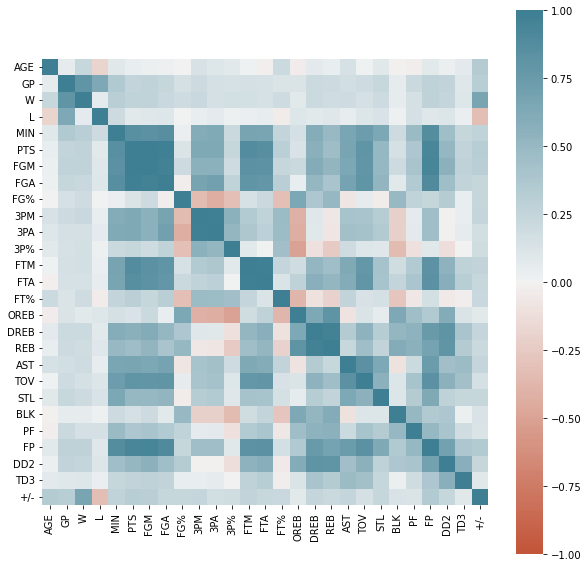

In [5]:
corrHeatMap(basicData)

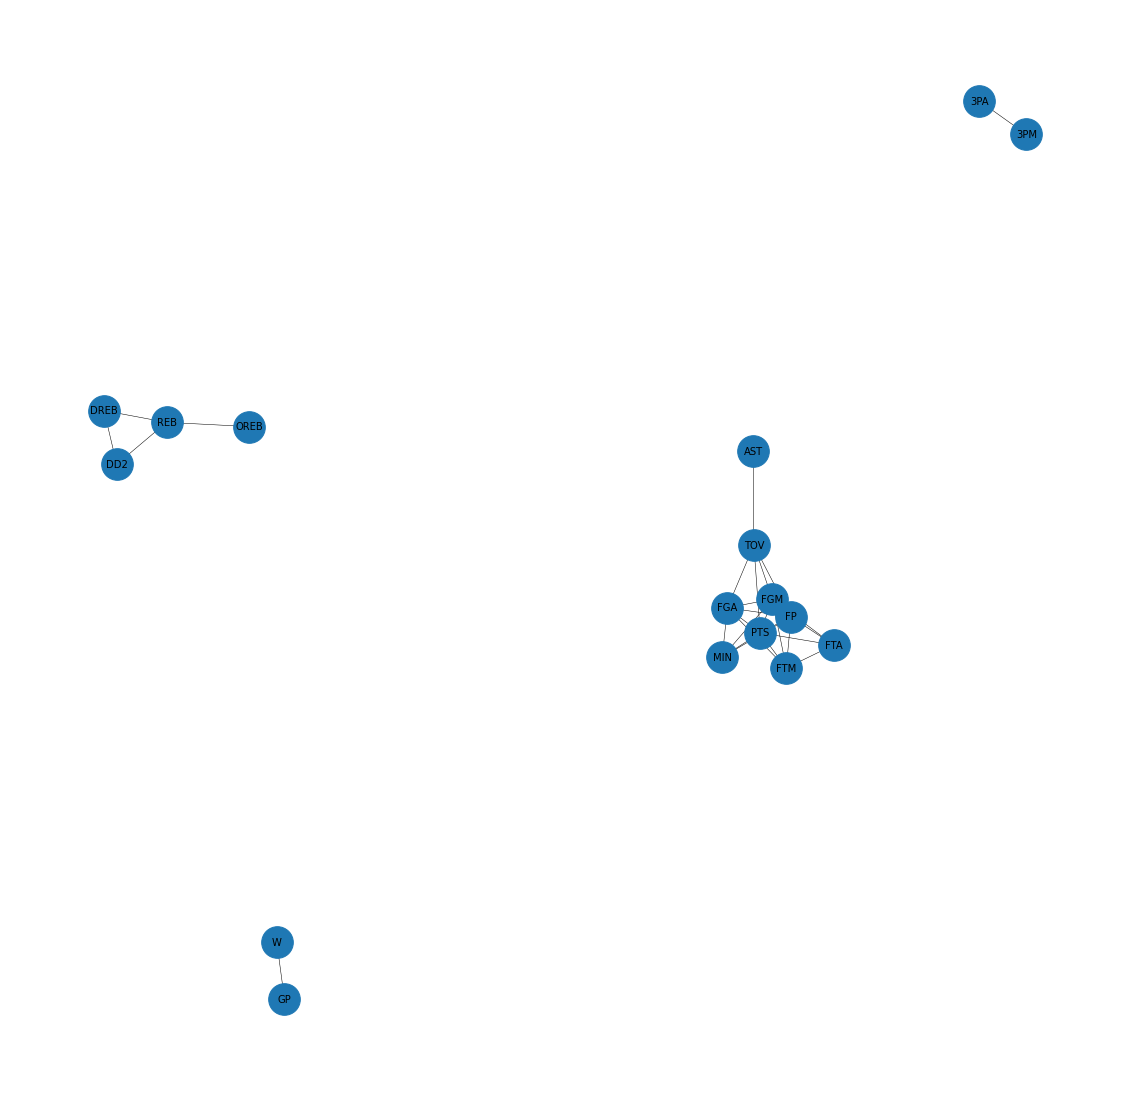

In [6]:
highCorrGraph(basicData)

In [7]:
defenseData = pd.read_excel('./Data/General/defenseStats.xlsx')
checkData(defenseData)

Shape: (540, 21)
Has Null: False


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


In [8]:
defenseData.drop("Unnamed: 0", axis=1, inplace=True)
defenseData = dropPlayers(defenseData)

checkData(defenseData)

Shape: (397, 20)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,STL,STL%,BLK,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,72,23,49,32.1,115.6,3.8,12.1,17.8,1.1,19.5,0.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,107.3,3.3,9.9,13.9,0.6,15.6,0.1,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,72,40,32,31.4,108.3,3.4,10.9,15.6,0.6,11.7,0.3,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,72,21,51,25.7,112.8,2.7,10.2,14.2,0.6,16.9,0.1,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,72,42,30,24.4,114.8,7.1,28.1,40.4,0.5,14.9,0.7,27.9,6.8,6.8,6.8,25.0,0.042


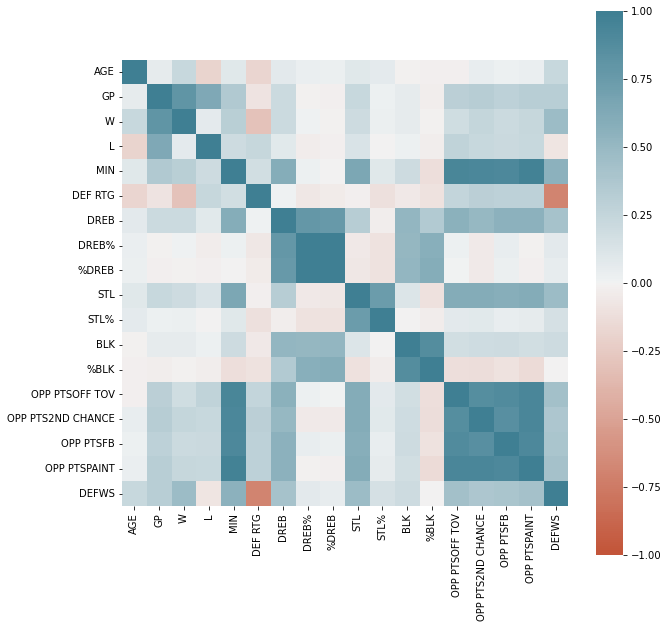

In [9]:
corrHeatMap(defenseData)

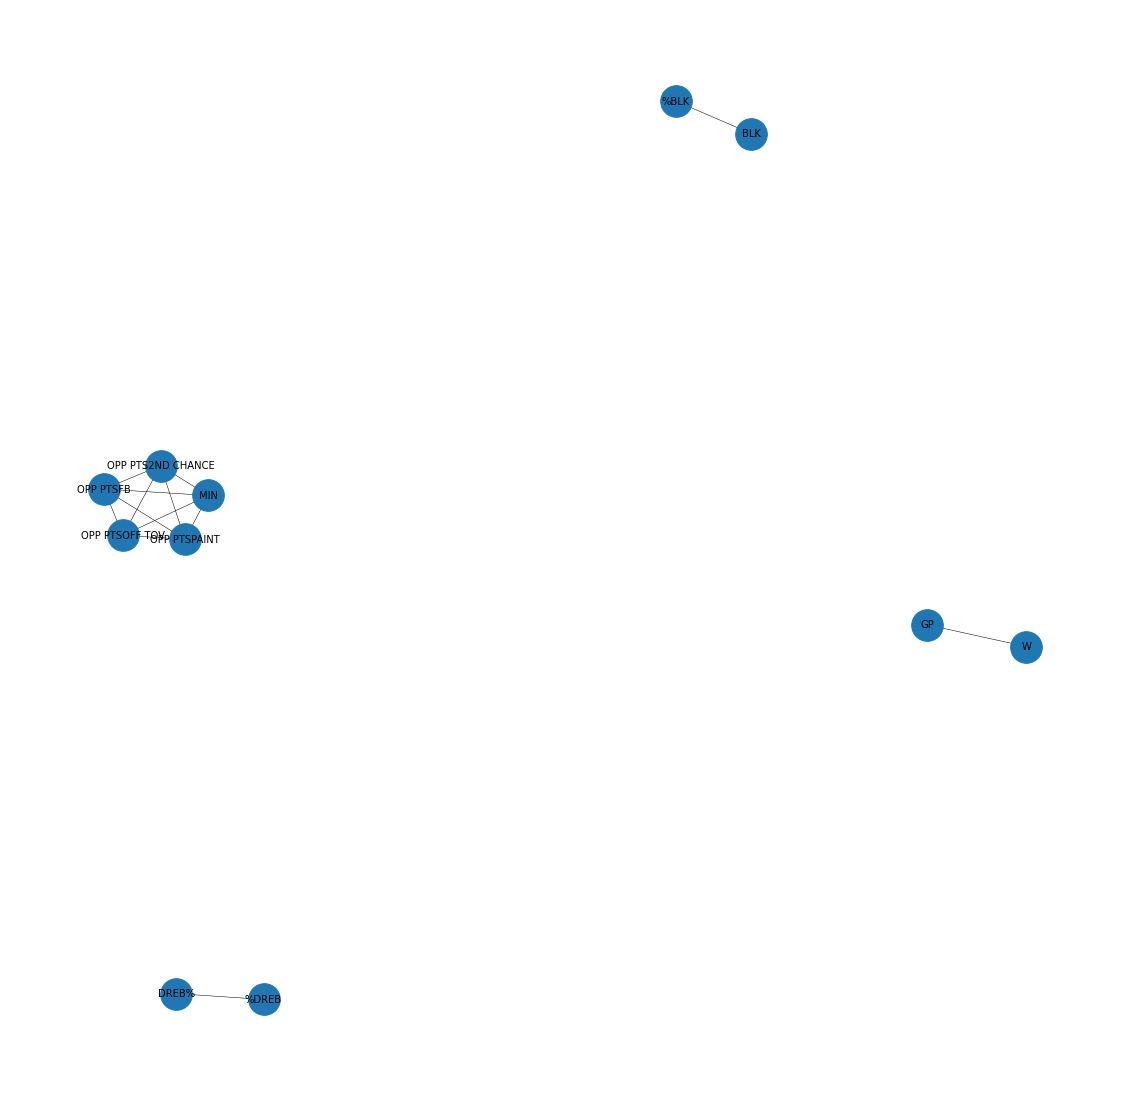

In [10]:
highCorrGraph(defenseData)

- **OPP PTSFB**: Opponent Fast Break Points
- **OPP PTSOFF TOV**: Opponent Points Off Turnovers
- **OPP PTS2ND CHANCE**: Opponent 2nd Chance Points
- **OPP PTSPAINT**: Opponent Points in Paint
- **MIN**: Minutes
- **%DREB**: The percentage of team's defensive rebounds that a player has while on court
- **DREB%**: The percentage of available defensive rebounds a player or team obtains while on the floor
- **%BLK**: Percent of Team's Blocks
- **BLK**: Number of Blocks

In [11]:
defenseData.drop(['GP','L','BLK','DREB','MIN'],axis=1,inplace=True)
checkData(defenseData)

Shape: (397, 15)
Has Null: False


,Player,TEAM,AGE,W,DEF RTG,DREB%,%DREB,STL,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
0,Anthony Edwards,MIN,19,23,115.6,12.1,17.8,1.1,19.5,14.6,11.3,9.8,10.4,34.1,0.048
1,Bojan Bogdanovic,UTA,32,52,107.3,9.9,13.9,0.6,15.6,1.6,11.5,7.9,7.8,33.3,0.121
2,Duncan Robinson,MIA,27,40,108.3,10.9,15.6,0.6,11.7,11.0,10.6,7.8,6.7,26.8,0.113
3,Dwayne Bacon,ORL,25,21,112.8,10.2,14.2,0.6,16.9,3.1,8.0,5.9,7.6,26.2,0.060
4,Enes Freedom,POR,29,42,114.8,28.1,40.4,0.5,14.9,27.9,6.8,6.8,6.8,25.0,0.042


**Dropped Columns**
- GP
- L
- BLK
- DREB
- MIN

In [12]:
scoringData = pd.read_excel('./Data/General/scoringStats.xlsx')
scoringData.drop("Unnamed: 0", axis=1, inplace=True)
scoringData = dropPlayers(scoringData)

checkData(scoringData)

Shape: (397, 22)
Has Null: False


,Player,TEAM,AGE,GP,W,L,MIN,%FGA2PT,%FGA3PT,%PTS2PT,%PTS2PT MR,%PTS3PT,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST,FGM%AST,FGM%UAST
0,Anthony Edwards,MIN,19,72,23,49,32.1,57.1,42.9,48.0,4.5,36.9,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8,47.3,52.7
1,Bojan Bogdanovic,UTA,32,72,52,20,30.8,50.2,49.8,36.9,3.4,44.1,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9,65.5,34.5
2,Duncan Robinson,MIA,27,72,40,32,31.4,14.5,85.5,13.8,1.1,79.6,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8,95.6,4.4
3,Dwayne Bacon,ORL,25,72,21,51,25.7,71.5,28.5,59.1,10.9,22.5,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7,44.5,55.5
4,Enes Freedom,POR,29,72,42,30,24.4,99.3,0.7,83.9,0.2,0.4,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0,46.0,54.0


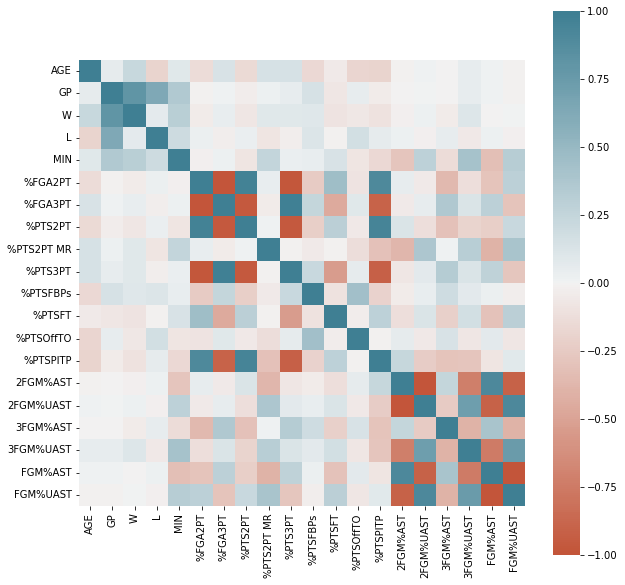

In [13]:
corrHeatMap(scoringData)

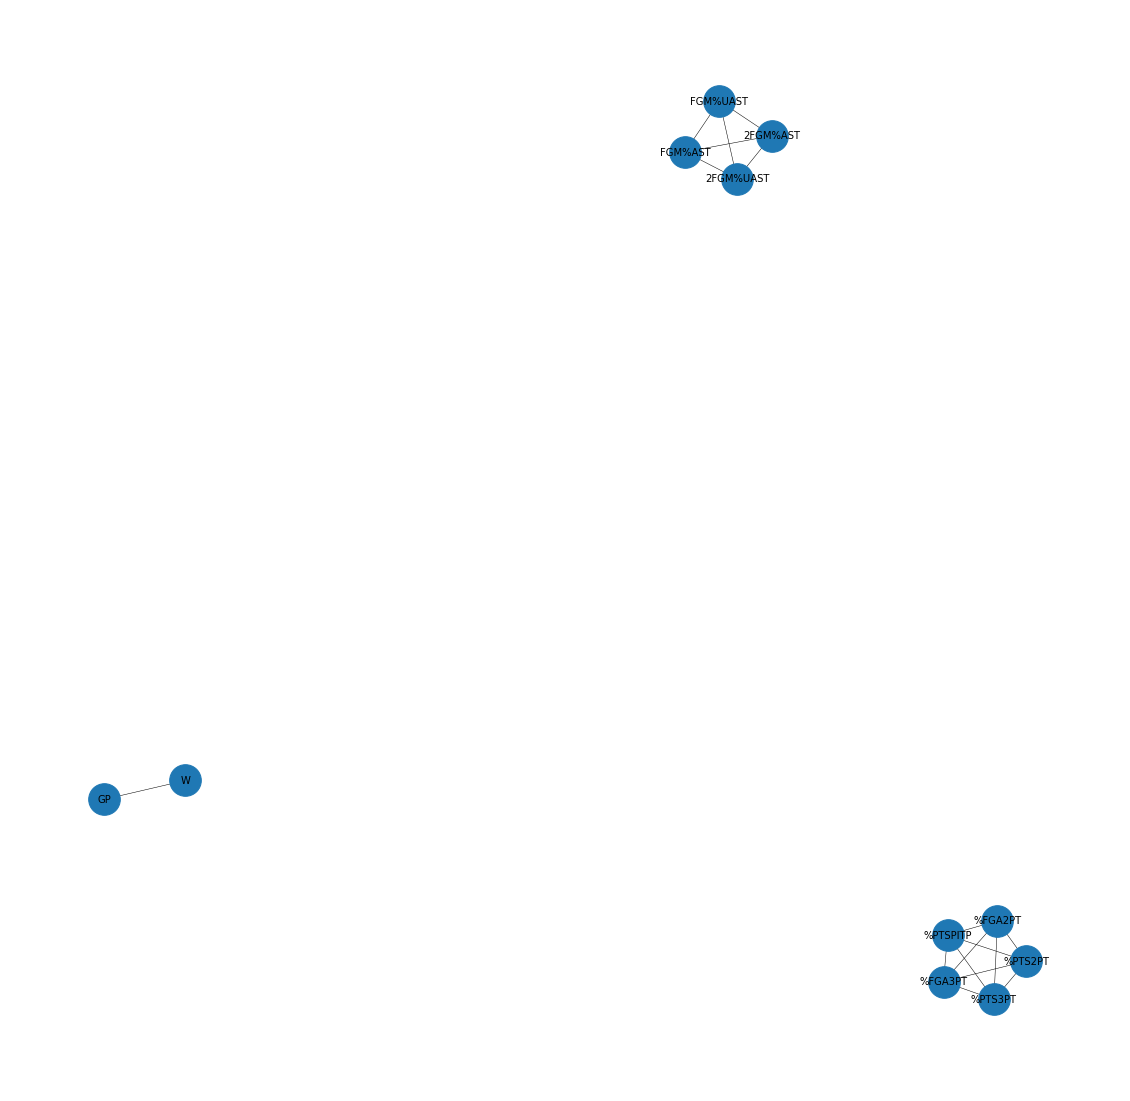

In [14]:
highCorrGraph(scoringData)

- **%PTS3PT**: Percent of 3 Pointers
- **%PTS2PT**: Percent of 2 Pointers
- **%FGA3PT**: Percent of Field Goals Attempted (3 PT)
- **%FGA2PT**: Percent of Field Goals Attempted (2 PT)
- **%PTSPITP**: Percent of of Points in the Paint

- **2FGM%UAST**: Percent of 2 PT Field Goals Unassisted
- **FGM%UAST**: Percent of PT Field Goals Unassisted
- **2FGM%AST**: Percent of 2 PT Field Goals Assisted
- **FGM%AST**: Percent of PT Field Goals Assisted

In [15]:
scoringData.drop(['GP','L','MIN','%PTS3PT','%PTS2PT','FGM%AST','FGM%UAST'],axis=1,inplace=True)
checkData(scoringData)

Shape: (397, 15)
Has Null: False


,Player,TEAM,AGE,W,%FGA2PT,%FGA3PT,%PTS2PT MR,%PTSFBPs,%PTSFT,%PTSOffTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,3FGM%UAST
0,Anthony Edwards,MIN,19,23,57.1,42.9,4.5,11.1,15.1,15.5,43.5,39.2,60.8,63.2,36.8
1,Bojan Bogdanovic,UTA,32,52,50.2,49.8,3.4,13.5,19.0,13.6,33.5,41.2,58.8,96.1,3.9
2,Duncan Robinson,MIA,27,40,14.5,85.5,1.1,10.3,6.6,17.2,12.7,89.2,10.8,97.2,2.8
3,Dwayne Bacon,ORL,25,21,71.5,28.5,10.9,17.9,18.4,14.2,48.2,40.8,59.2,59.3,40.7
4,Enes Freedom,POR,29,42,99.3,0.7,0.2,4.0,15.7,10.7,83.6,45.9,54.1,100.0,0.0


**Dropped Columns**
- GP
- L
- MIN
- %PTS3PT
- %PTS2PT
- FGM%AST
- FGM%UAST